In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold
)


In [2]:

# =========================
# 2. Chargement des données
df_for_ml = pd.read_csv("./df_for_ml.csv")

# Nom de la colonne cible (labels)
target_col = "emotion_label"

# Colonnes de features (toutes les colonnes qui commencent par 'f_')
feature_cols = [col for col in df_for_ml.columns if col.startswith("f_")]

X = df_for_ml[feature_cols]        # features (fréquences f_0, f_1, ..., f_119)
y_str = df_for_ml[target_col]      # labels sous forme de texte ("happy", "sad", etc.)


In [9]:


# # =========================
# # 1. Préparation X / y
# # =========================
# feature_cols = [col for col in df_for_ml.columns if col.startswith("f_")]
# target_col = "emotion_label"

# X = df_for_ml[feature_cols].to_numpy(dtype="float32")
# y_str = df_for_ml[target_col].to_numpy()

# # Encodage des labels texte -> entiers
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y_str)

# # =========================
# # 2. Train / Test split
# # =========================
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.2,
#     random_state=42,
#     stratify=y
# )

# # =========================
# # 3. Définition du modèle + grille d’hyperparamètres
# # =========================
# rf_base = RandomForestClassifier(
#     random_state=42,
#     n_jobs=-1
# )

# param_grid = {
#     "n_estimators": [400, 500],
#     "max_depth": [None, 30],
#     "min_samples_split": [2, 4],
#     "min_samples_leaf": [2, 4],
#     "max_features": ["sqrt", "log2", 0.5],
# }

# # 5-fold stratifié pour garder les proportions de classes
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# grid_search = GridSearchCV(
#     estimator=rf_base,
#     param_grid=param_grid,
#     scoring="accuracy",
#     cv=cv_strategy,
#     n_jobs=-1,
#     verbose=2
# )

# # =========================
# # 4. Lancement du Grid Search
# # =========================
# print("=== Grid Search Random Forest ===")
# grid_search.fit(X_train, y_train)

# print("\nMeilleurs hyperparamètres trouvés :")
# print(grid_search.best_params_)

# print(f"\nMeilleure accuracy moyenne en CV : {grid_search.best_score_:.3f}")

# # =========================
# # 5. Évaluation sur le set de test
# # =========================
# best_rf = grid_search.best_estimator_

# y_test_pred = best_rf.predict(X_test)

# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"\nAccuracy sur le test (meilleur modèle) : {test_accuracy:.3f}\n")

# print("Rapport de classification :")
# print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# print("Matrice de confusion :")
# print(confusion_matrix(y_test, y_test_pred))


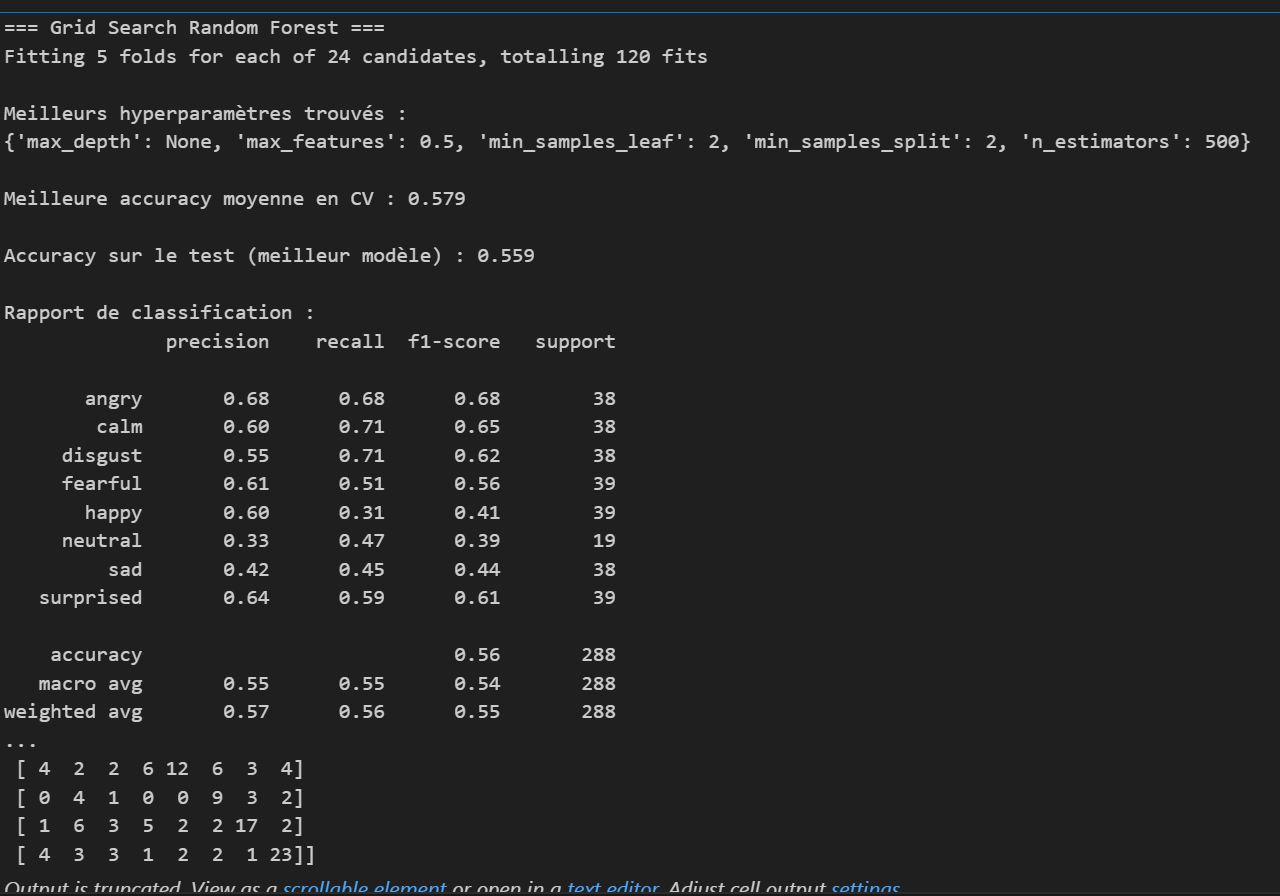


In [ ]:
# =========================
rf_final = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=0.5,
    n_jobs=-1,
    random_state=42
)

# =========================
# 4. Entraînement
# =========================
rf_final.fit(X_train, y_train)

# =========================
# 5. Évaluation sur le set de test
# =========================
y_test_pred = rf_final.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Random Forest FINAL sur le test : {test_accuracy:.3f}\n")

print("Rapport de classification :")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_test_pred))

# =========================
# 6. Table de sortie avec labels décodés
# =========================
# Décodage des labels entiers -> labels texte
y_test_true_labels = label_encoder.inverse_transform(y_test)
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

df_results = pd.DataFrame({
    "true_label_int": y_test,
    "true_label_str": y_test_true_labels,
    "pred_label_int": y_test_pred,
    "pred_label_str": y_test_pred_labels,
})

print("\nAperçu des prédictions (labels décodés) :")
print(df_results.head())

# =========================
# (Optionnel) Ajouter aussi les probabilités prédites
# =========================
probas_test = rf_final.predict_proba(X_test)  # shape: (n_samples, n_classes)

# On crée un DataFrame avec une colonne par classe (nommée par le label texte)
proba_cols = [f"proba_{cls}" for cls in label_encoder.classes_]
df_probas = pd.DataFrame(probas_test, columns=proba_cols)

# On concatène avec df_results
df_results_full = pd.concat([df_results.reset_index(drop=True),
                             df_probas.reset_index(drop=True)], axis=1)

print("\nAperçu complet avec probabilités :")
print(df_results_full.head())

Accuracy Random Forest FINAL sur le test : 0.559

Rapport de classification :
              precision    recall  f1-score   support

       angry       0.68      0.68      0.68        38
        calm       0.60      0.71      0.65        38
     disgust       0.55      0.71      0.62        38
     fearful       0.61      0.51      0.56        39
       happy       0.60      0.31      0.41        39
     neutral       0.33      0.47      0.39        19
         sad       0.42      0.45      0.44        38
   surprised       0.64      0.59      0.61        39

    accuracy                           0.56       288
   macro avg       0.55      0.55      0.54       288
weighted avg       0.57      0.56      0.55       288

Matrice de confusion :
[[26  0  8  0  1  0  0  3]
 [ 0 27  1  0  0  6  4  0]
 [ 3  0 27  1  0  1  5  1]
 [ 0  3  4 20  3  1  7  1]
 [ 4  2  2  6 12  6  3  4]
 [ 0  4  1  0  0  9  3  2]
 [ 1  6  3  5  2  2 17  2]
 [ 4  3  3  1  2  2  1 23]]

Aperçu des prédictions (labels

In [ ]:
df_results_full

,true_label_int,true_label_str,pred_label_int,pred_label_str,proba_angry,proba_calm,proba_disgust,proba_fearful,proba_happy,proba_neutral,proba_sad,proba_surprised
0,6,sad,7,surprised,0.124383,0.037567,0.036133,0.177700,0.142033,0.041100,0.101617,0.339467
1,1,calm,1,calm,0.030533,0.487033,0.164467,0.023433,0.057133,0.036400,0.170633,0.030367
2,4,happy,1,calm,0.022267,0.309767,0.097167,0.083967,0.118600,0.134567,0.170400,0.063267
3,0,angry,0,angry,0.301633,0.000667,0.040500,0.169233,0.214733,0.002000,0.066000,0.205233
4,5,neutral,6,sad,0.047533,0.150933,0.034633,0.175033,0.092267,0.126567,0.241600,0.131433
...,...,...,...,...,...,...,...,...,...,...,...,...
283,2,disgust,6,sad,0.016067,0.122900,0.160157,0.030467,0.049833,0.125519,0.430767,0.064290
284,6,sad,3,fearful,0.060167,0.009733,0.041167,0.371671,0.227167,0.003600,0.215362,0.071133
285,3,fearful,3,fearful,0.106843,0.016000,0.151762,0.369700,0.141405,0.001333,0.140390,0.072567
286,7,surprised,7,surprised,0.076117,0.021000,0.022633,0.167133,0.234289,0.016083,0.052478,0.410267
